# Topic Analysis on TESS Toronto Emotional speech set data

A. Convert speech to text using python 

B. Conduct sentiment analysis on the text data 

C. Find the topics in the text using LDA.

D. Find salient entities in the speech 

The sample audio set used for this analysis is 225 audio sets which would be converted to text and topic modelling would be done on this.

In [1]:
import os
import numpy as np
%pylab inline
import glob
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
import speech_recognition as sr

# Objective 1- Speech to text Conversion

In [8]:
import csv
DIRNAME = r'C:\Users\Vignesh\Desktop\Python Projects\TESS Toronto emotional speech set data\Combined Train'
OUTPUTFILE = r'C:\Users\Vignesh\Desktop\Python Projects\TESS Toronto emotional speech set data\Combined Train\outputfile.csv'

def get_file_paths(dirname):
    file_paths = []  
    for root, directories, files in os.walk(dirname):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)  
    return file_paths    

def process_file(file):
    r = sr.Recognizer()
    a = ''
    with sr.AudioFile(file) as source:
        audio = r.record(source)    
        try:
            a =  r.recognize_google(audio)      
        except sr.UnknownValueError:
            a = "Audio not clear"
        except sr.RequestError as e:
            a = "Could not request results from Google Speech Recognition service; {0}".format(e)  
    return a

def main():
    files = get_file_paths(DIRNAME)                 
    for file in files:                              
        (filepath, ext) = os.path.splitext(file)    
        file_name = os.path.basename(file)          
        if ext == '.wav':                           
            a = process_file(file)                  
            with open(OUTPUTFILE, 'a') as f:        
                writer = csv.writer(f)
                writer.writerow([file_name, a])            


if __name__ == '__main__':
    main()

In [5]:
df=pd.read_csv('outputfile.csv')

In [6]:
df

,OAF_back_angry.wav,Audio not clear
0,OAF_back_disgust.wav,Audio not clear
1,OAF_back_fear.wav,Sweden
2,OAF_back_happy.wav,is the word
3,OAF_back_neutral.wav,size of word
4,OAF_back_ps.wav,main is a word
...,...,...
3594,OAF_youth_fear.wav,Audio not clear
3595,OAF_youth_happy.wav,where is the work
3596,OAF_youth_neutral.wav,se is a word
3597,OAF_youth_ps.wav,Audio not clear


In [7]:
text=df.rename(columns={df.columns[0]:"File_Name",df.columns[1]:"Speech_to_text"})

In [8]:
text

,File_Name,Speech_to_text
0,OAF_back_disgust.wav,Audio not clear
1,OAF_back_fear.wav,Sweden
2,OAF_back_happy.wav,is the word
3,OAF_back_neutral.wav,size of word
4,OAF_back_ps.wav,main is a word
...,...,...
3594,OAF_youth_fear.wav,Audio not clear
3595,OAF_youth_happy.wav,where is the work
3596,OAF_youth_neutral.wav,se is a word
3597,OAF_youth_ps.wav,Audio not clear


# Objective 2- Sentiment Analysis

In [9]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [10]:
polarity=[]
subjectivity=[]
for i in text['Speech_to_text'].values:
    try:
        analysis=TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
    
    except:
        polarity.append(0)
        subjectivity.append(0)

In [11]:
text['Polarity']=polarity
text['Subjectivity']=subjectivity

In [12]:
text

,File_Name,Speech_to_text,Polarity,Subjectivity
0,OAF_back_disgust.wav,Audio not clear,-0.050000,0.383333
1,OAF_back_fear.wav,Sweden,0.000000,0.000000
2,OAF_back_happy.wav,is the word,0.000000,0.000000
3,OAF_back_neutral.wav,size of word,0.000000,0.000000
4,OAF_back_ps.wav,main is a word,0.166667,0.333333
...,...,...,...,...
3594,OAF_youth_fear.wav,Audio not clear,-0.050000,0.383333
3595,OAF_youth_happy.wav,where is the work,0.000000,0.000000
3596,OAF_youth_neutral.wav,se is a word,0.000000,0.000000
3597,OAF_youth_ps.wav,Audio not clear,-0.050000,0.383333


# Objective 3-Topic finding using LDA

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Text here")

In [14]:
def lemmatization(texts,allowed_postags=['NOUN','ADJ']):
    output=[]
    for sent in texts:
        doc=nlp(sent)
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output

In [15]:
text_list=text['Speech_to_text'].to_list()
print(text_list)
tokenized_reviews=lemmatization(text_list)
print(tokenized_reviews[1])

['Audio not clear', 'Sweden', 'is the word', 'size of word', 'main is a word', 'Audio not clear', 'Audio not clear', 'sweet the word', 'Audio not clear', 'Shahid', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Sahi the word page', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Shahid', 'is a', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'se', 'shahidon', 'Audio not clear', 'play the word', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Sahi the world', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'size of word', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'Audio not clear', 'is the word', 'size of 

[]


In [16]:
import gensim
from gensim import corpora

In [17]:
dictionary=corpora.Dictionary(tokenized_reviews)
doc_term_matrix=[dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [18]:
LDA=gensim.models.ldamodel.LdaModel

In [19]:
lda_model=LDA(corpus=doc_term_matrix,id2word=dictionary,num_topics=10,random_state=100,chunksize=1000,passes=50,iterations=100)

In [20]:
lda_model.print_topics()

[(0,
  '0.806*"word" + 0.072*"sahi" + 0.037*"boy" + 0.018*"show" + 0.011*"hair" + 0.009*"sahido" + 0.009*"award" + 0.006*"file" + 0.006*"liver" + 0.005*"cedarwood"'),
 (1,
  '0.529*"size" + 0.351*"word" + 0.026*"search" + 0.012*"mess" + 0.009*"tire" + 0.009*"show" + 0.009*"road" + 0.009*"cyber" + 0.009*"week" + 0.006*"chief"'),
 (2,
  '0.665*"Shahid" + 0.065*"chain" + 0.044*"play" + 0.033*"silver" + 0.033*"hay" + 0.033*"swimming" + 0.033*"page" + 0.001*"sahi" + 0.001*"word" + 0.001*"world"'),
 (3,
  '0.311*"sweet" + 0.206*"verge" + 0.053*"workshop" + 0.053*"sure" + 0.051*"noise" + 0.038*"light" + 0.038*"street" + 0.038*"xavier" + 0.038*"siren" + 0.038*"hai"'),
 (4,
  '0.498*"audio" + 0.498*"clear" + 0.000*"name" + 0.000*"week" + 0.000*"cyber" + 0.000*"race" + 0.000*"wordbrain" + 0.000*"phone" + 0.000*"way" + 0.000*"noise"'),
 (5,
  '0.497*"audio" + 0.497*"clear" + 0.002*"wordbrain" + 0.002*"way" + 0.000*"name" + 0.000*"week" + 0.000*"cyber" + 0.000*"race" + 0.000*"phone" + 0.000*"noise

# Objective 4- Finding the Salient Features

In [21]:
import pyLDAvis

In [22]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [23]:
lda_viz = gensimvis.prepare(lda_model,doc_term_matrix,dictionary)
lda_viz

C:\Users\Vignesh\.conda\envs\tensorflow\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.445105  0.009793       1        1  30.647228
5      0.442441  0.011875       2        1  29.056032
1     -0.102616 -0.371962       3        1   7.865394
0     -0.098652 -0.377655       4        1   7.101101
6     -0.062724  0.097905       5        1   5.646348
2     -0.100590  0.113288       6        1   4.167066
9     -0.127473  0.132857       7        1   4.090583
3     -0.117857  0.129113       8        1   4.037404
8     -0.135090  0.129976       9        1   3.761345
7     -0.142544  0.124810      10        1   3.627500, topic_info=      Term         Freq        Total Category  logprob  loglift
2     word   509.000000   509.000000  Default  30.0000  30.0000
0    audio  1778.000000  1778.000000  Default  29.0000  29.0000
1    clear  1778.000000  1778.000000  Default  28.0000  28.0000
9    world   261.000000   261.000000  Default  27.0000  27.0000
3     size   251.000000   251.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
76     boy     0.849577    18.438108  Topic10  -5.5421   0.2392
4     main     0.849577    13.935573  Topic10  -5.5421   0.5192
5    sweet     0.849577    77.654657  Topic10  -5.5421  -1.1987
6   Shahid     0.849577   168.418758  Topic10  -5.5421  -1.9728
7     page     0.849577    10.920865  Topic10  -5.5421   0.7629

[473 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
6         6  0.985638  Shahid
6         9  0.005938  Shahid
6        10  0.005938  Shahid
0         1  0.513332   audio
0         2  0.485219   audio
...     ...       ...     ...
9         9  0.003830   world
9        10  0.003830   world
38        8  0.764791  xavier
38        9  0.084977  xavier
38       10  0.084977  xavier

[235 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 2, 1, 7, 3, 10, 4, 9, 8])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
analysis=text['Speech_to_text']

In [26]:
analysis.head()

0    Audio not clear
1             Sweden
2        is the word
3       size of word
4     main is a word
Name: Speech_to_text, dtype: object

In [27]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    vectorized_headlines = count_vectorizer.fit_transform(analysis.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

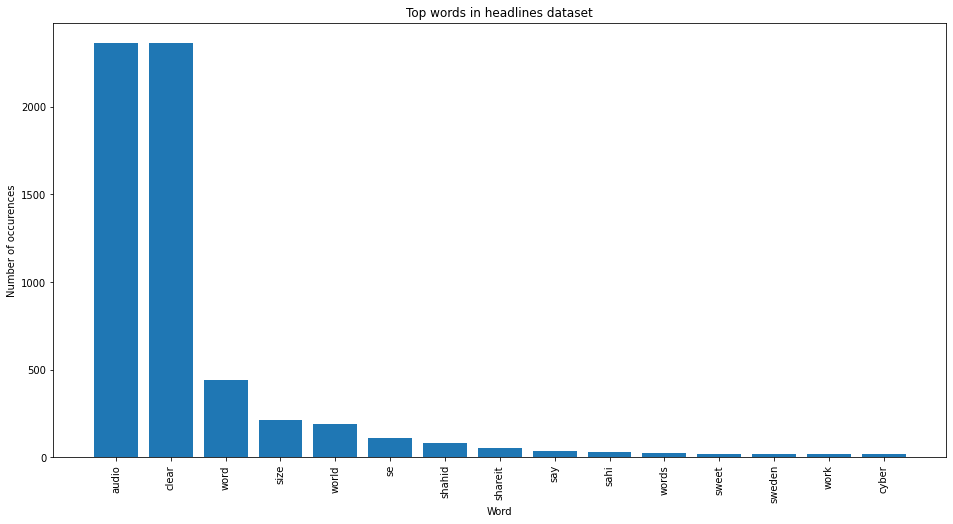

In [28]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=analysis)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()